In [1]:
print("""
@Title        : Exploring Financial Time Series Data
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-13 22:37:00
@Description  : 
""")


@Title        : Exploring Financial Time Series Data
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-13 22:37:00
@Description  : 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Outlier detection using rolling statistics

In [45]:
df = pd.read_csv('../data/TSLA_20190101_20201231.csv', index_col='Date', parse_dates=['Date'])
df['rtn'] = df['Adj Close'].pct_change()
df = df[['rtn']].copy()

In [46]:
df_rolling = df[['rtn']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

# why not ?
# df_rolling = df['rtn'].rolling(window=21).agg(['mean', 'std'])

In [47]:
df = df.join(df_rolling)

In [48]:
N_SIGMAS = 3

df['upper'] = df['mean'] + N_SIGMAS * df['std']
df['lower'] = df['mean'] - N_SIGMAS * df['std']

In [49]:
df['outlier'] = ((df['rtn'] > df['upper']) | (df['rtn'] < df['lower']))

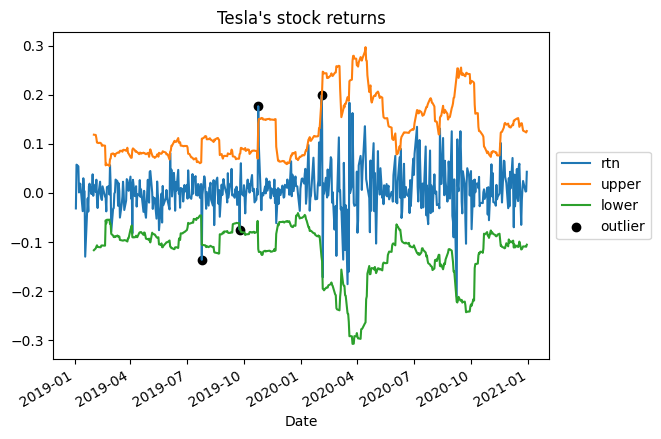

In [53]:
fig, ax = plt.subplots()
df[['rtn', 'upper', 'lower']].plot(ax=ax)
ax.scatter(df.loc[df['outlier'], 'rtn'].index,
           df.loc[df['outlier'], 'rtn'],
           color='black', label='outlier')
ax.set_title("Tesla's stock returns")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
fig.autofmt_xdate()
plt.show()

In [51]:
df.loc[df['outlier']].index

DatetimeIndex(['2019-07-25', '2019-09-24', '2019-10-24', '2020-02-03'], dtype='datetime64[ns]', name='Date', freq=None)

In [52]:
df.loc[df['outlier'], 'rtn'].values

array([-0.13613708, -0.07470053,  0.17669232,  0.19894859])